# Wtf is happening in ultrasound power doppler?


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import utils

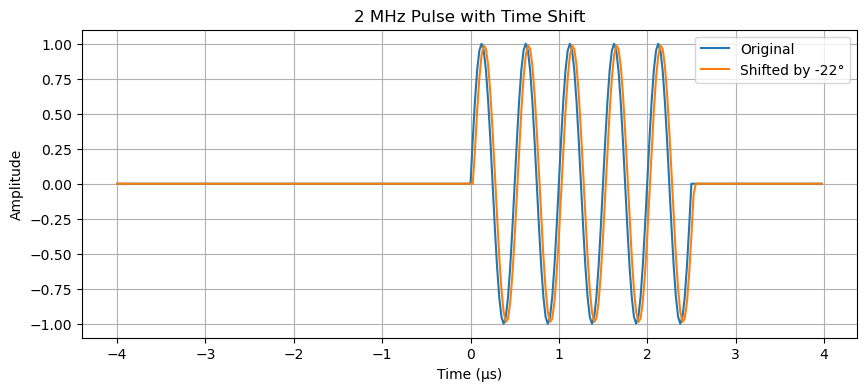

In [2]:
# Create time vector for 2 MHz signal
fs = 40e6  # Sampling frequency (10x signal frequency for good resolution)
n_cycles = 5
t = np.arange(-4e-6, 4e-6, 1 / fs)  # Time vector with padding

# Generate single pulse
freq = 2e6  # 2 MHz frequency
pulse = utils.generate_pulse(t, freq, n_cycles)

# Time shift the pulse by 90 degrees (π/2 radians)
phase_shift = -np.pi / 8
shifted_pulse = utils.time_shift(pulse, t, phase_shift, freq)

# Plot original and shifted pulses
plt.figure(figsize=(10, 4))
plt.plot(t * 1e6, pulse, label="Original")
plt.plot(t * 1e6, shifted_pulse, label=f"Shifted by {np.degrees(phase_shift):.0f}°")
plt.grid(True)
plt.xlabel("Time (μs)")
plt.ylabel("Amplitude")
plt.title("2 MHz Pulse with Time Shift")
plt.legend()
plt.show()

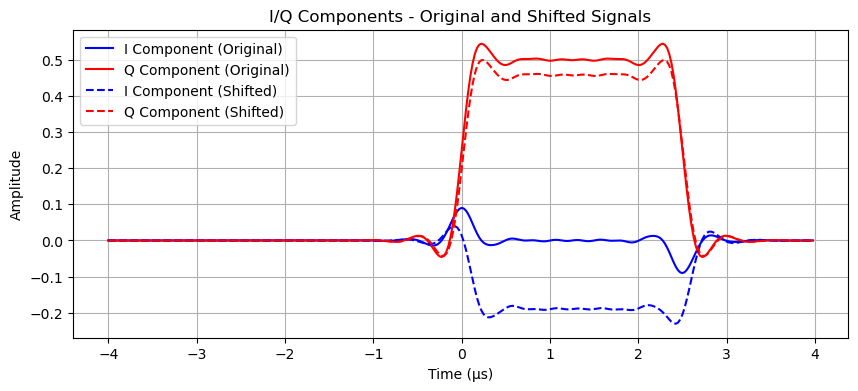

In [3]:
# Perform I/Q demodulation on both signals
i_demod, q_demod = utils.iq_demodulate(pulse, t, freq, fs)
i_demod_shifted, q_demod_shifted = utils.iq_demodulate(shifted_pulse, t, freq, fs)

# Plot I/Q components
plt.figure(figsize=(10, 4))
plt.plot(t * 1e6, i_demod, "-", label="I Component (Original)", color="blue")
plt.plot(t * 1e6, q_demod, "-", label="Q Component (Original)", color="red")
plt.plot(t * 1e6, i_demod_shifted, "--", label="I Component (Shifted)", color="blue")
plt.plot(t * 1e6, q_demod_shifted, "--", label="Q Component (Shifted)", color="red")
plt.grid(True)
plt.xlabel("Time (μs)")
plt.ylabel("Amplitude")
plt.title("I/Q Components - Original and Shifted Signals")
plt.legend()
plt.show()